1. 회귀
    - Decision Tree
    - Random Forest
    - GBM
    - XGB Reg
    - LGB Reg
2. 분류
    - 나이브베이즈
    - KNN
    - Decision Tree Classifier
    - SVM
    - 스태킹앙상블
    - 앙상블(Voting)
    - Bagging(RF Classifier)
    - XGB Classifier
3. 군집
    - Hierarchical Clustering
    - K-Means Clustering
    - Mean-Shift Clustering
    - GMM
    - DBSCAN
4. 차원축소
    - 요인분석
    - PCA 주성분분석
    - LDA 선형판별분석
    - SVD
    - NMF

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  ##warning sign 출력 무시
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ##scientific notation 삭제
plt.rcParams['font.family'] = 'Malgun Gothic'  ##한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False    ##마이너스기호 깨짐 방지

In [42]:
## 군집, 회귀용 데이터 생성 (보스턴 집값 데이터)
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [43]:
df['CHAS'] = df['CHAS'].astype(object) ##데이터 타입 변경
##결측값은 평균으로 대체
df[['CRIM','ZN','INDUS','AGE','LSTAT']] = df[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((df[['CRIM','ZN','INDUS','AGE','LSTAT']].mean())) 
df['CHAS'] = df['CHAS'].fillna(method = 'bfill') ##이전값으로 채우기

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

# 예측 회귀

### Decision Tree Regressor
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류규칙을 만듬(if-else 기반 규칙)
- 장점 : 쉽고 직관적, 피처의 스케일링이나 정규화 등의 사전 가공영향도가 크지 않음
- 단점 : 과적합이 발생해 반대로 예측성능이 저하될 수 있음, 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요
     
- 정보 균일도 측정방법 : 정보이득, 지니계수
     
- 정보이득 : 엔트로피 개념 기반, 엔트로피는 주어진 데이터 집합의 혼잡도 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음, 정보이득지수는 1에서 엔트로피지수를 뺀 값, 즉 1-엔트로피 지수, 결정트리는 이 정보 이득지수로 분할기준을 정함, 즉 정보이득이 높은 속성을 기준으로 분할함
     
- 지니계수 : 불평등 지수, 0이 가장 평등하고, 1로 갈수록 불평등함, 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석되어 계수가 낮은 속성 기준으로 분할함
    
- sklearn.tree.DecisionTreeRegressor()
    - max_depth : 트리의 최대 깊이를 규정
    - max_features : 최적의 분할을 위해 고려할 최대 피처 개수
    - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수
    - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터수
    - max_leaf_nodes : 말단 노드의 최대 개수

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(max_depth=6)  ##학습시키기
dtreg1 = dtreg.fit(X_train, y_train)

In [46]:
print(dtreg1.score(X_train, y_train))
print(dtreg1.score(X_test, y_test))

0.9539273064847269
0.6082596858219806


In [47]:
## cross validation 이용해서 평가하기
from sklearn.model_selection import cross_val_score

cross_val_score(dtreg1, X_test, y_test, cv=10)

array([ 0.77480262,  0.8547675 ,  0.51323219,  0.96244332,  0.09723938,
        0.79318068,  0.39565389,  0.86525164,  0.79824361, -4.57711153])

# 군집분석

## 1. Hierarchical Clustering (계층적 군집분석)
- 유클리드 거리를 이용한 군집분석 방법
- 덴드로그램
    - 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림
    - 3차원 이상의 군집에서도 dendogram을 통해 직관적인 cluster 형성이 가능하다는 장점이 있다.
- 군집화 방식(하이퍼파라미터 method)
    - Single : 최단 연결법, 두 군집에 있는 모든 데이터 조합에서 데이터 사이 거리를 측정해서 가장 최소 거리(작은 값)를 기준으로 군집 거리를 측정
    - Complete : 최장 연결법으로 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식
    - Average : 평균 연결법, 두 군집의 데이터들 간 모든 거리들의 평균을 군집간 거리로 정의 
    - Centroid : 두 군집의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 군집간의 거리로 측정
    - Ward : 연결될 수 있는 군집 조합을 만들고, 군집 내 편차들의 제곱합을 기준으로 (군집의 평균과 데이터들 사이의 오차 제곱합(SSE)을 측정해) 최소 제곱합을 가지게 되는 군집끼리 연결
- 거리계산방법(하이퍼파라미터 metric)
    - scipy.spatial.distance.pdist에서 사용가능한 거리계산방법 확인가능
    - 'minkowski': $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p} $, p=1일때 맨하탄거리, p=2일때 유클리드거리와 동일함
    - 'cityblock': 맨하탄거리
    - 'cosine': 코사인거리
    - 'correlation': 상관계수
    - 'jaccard': 두 벡터의 값들이 얼마나 불일치하는지 계산한 값

Step1. 군집간 거리를 계산할 method를 선택한 후 거리를 계산하기 & 덴드로그램 그리기
- scipy.cluster.hierarchy에서 linkage(y, mehod = 'single', metric = 'euclidean', optimal_ordering = False)
    - y값: 1-d condensed distance metrix (거리 데이터에서 대각선 상방 값만 존재하는 매트릭스) 또는 관측치의 2d array
    - return값: linkage matrix로 인코딩된 클러스터 결과

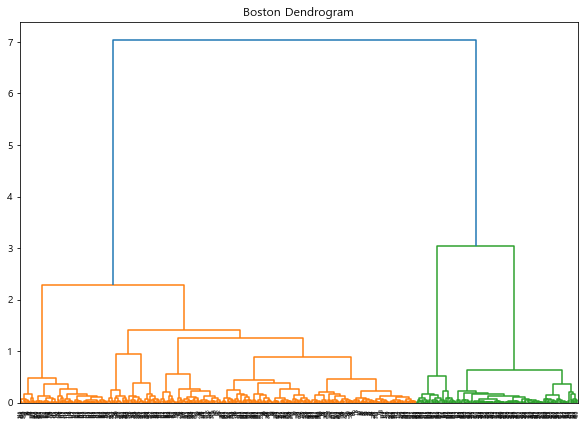

In [11]:
X = df.drop(['PRICE'], axis = 1)

##데이터 스케일에 차이가 많이 나기 때문에 Normalize를 해준다 (흠 )
from sklearn.preprocessing import normalize
X_scaled = normalize(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,7))
plt.title('Boston Dendrogram')
dend = shc.dendrogram(shc.linkage(X_scaled, method = 'ward'))

Step2. 덴드로그램 기준으로 군집을 나눌 개수를 선택하고 각 관측값에 군집번호 부여
- scipy.custer.hierarchy에서 cut_tree(Z, [n_clusters, height])  
    : 주어진 링키지 매트릭스 Z에서 n_cluster 개수만큼의 군집으로 나누거나, 주어진 height 기준으로 군집을 나눈다 (height로 자르는 것은 ultrametric tree에서만 가능하다)

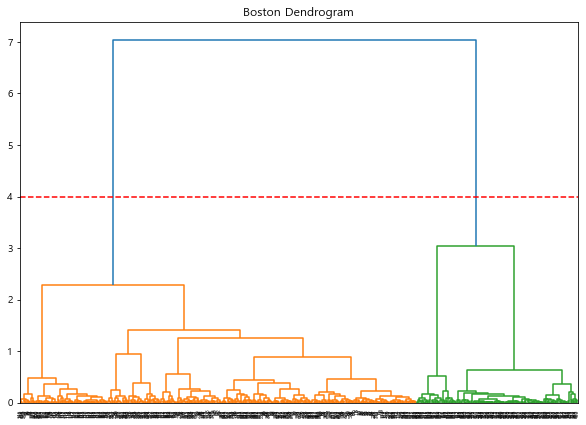

In [12]:
## 2개로 나누는 덴드로그램 시각화
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,7))
plt.title('Boston Dendrogram')
dend = shc.dendrogram(shc.linkage(X_scaled, method = 'ward'))
plt.axhline(y=4, color='r', linestyle='--')

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

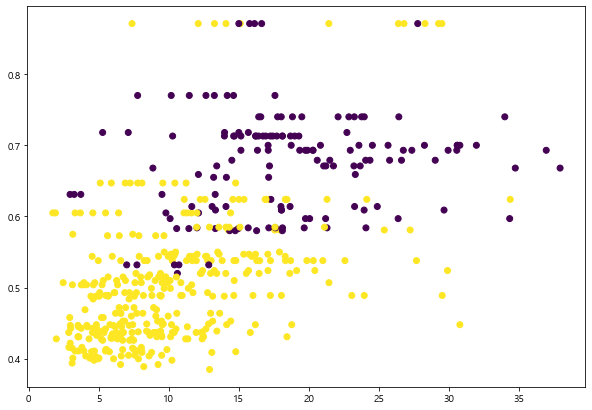

In [16]:
## cluster에 미친 두 개 변수의 영향을 알아보기 
plt.figure(figsize = (10,7))
plt.scatter(X['LSTAT'], X['NOX'], c = cluster.labels_)

Step3. 군집개수에 따른 성능 평가 (실루엣계수)
- $s(i)\; = \; {b(i) - a(i) \over max{a(i), b(i)}}$ &nbsp; where a(i) = "데이터포인트 i가 속하지 않은 클러스터C의 데이터 포인트와의 거리평균"의 최소값
- 각 데이터포인트들의 계수 평균이 1에 가까운수록 군집화가 잘 되었다고 본다
- 개별 클러스터의 실루엣계수를 구할 수도 있는데, 1에 가까운 실루엣계수 평균을 가지는 클러스터는 'clear-cut', 0에 가까운 클러스터는 'weak' 클러스터로 표현한다

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
print(silhouette_score(X, cluster.labels_))   ## Agrommerative Clustering으로 얻은 clustering label값

0.6776072306645798


In [19]:
## 포인트별 실루엣계수 구하기 (이것을 이용해 클러스터별 실루엣 계수도 계산 가능)
X['cluster'] = cluster.labels_

df['silhouette'] = silhouette_samples(X, cluster.labels_) ## 각 포인트에서의 실루엣계수를 계산한 뒤 array로 반환
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,silhouette
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000,0.81807
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000,0.78903
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000,0.79509
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000,0.77352
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000,0.77499


## K-Means Clustering (K-평균군집화)
- 데이터셋을 k의 군집으로 나눈다. k는 하이퍼파라미터로 사용자가 지정
- 군집의 중심이 될 것 같은 임의의 지점(centroid)을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 기법

- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
- 단점
    - 거리기반이기 때문에 속성 많을 수록 군집화 정확도 떨어진다 (이를 위해 PCA 해야할 수도 있음)
    - 반복횟수가 많을경우 수행 시간 느려짐
    - 몇개의 군집(cluster)를 선택해야 할지 사용자가 직접 정해주어야 함
      
- sklearn.cluster.KMeans(n_cluster = 8, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, verbose = 0, random_state = None, copy_x = True, algorithm = 'auto')
    - n_cluster 군집 중심점의 개수(최종 군집 개수)
    - init: 초기에 군집 중심점의 좌표를 설정할 방식, 보통은 k-means++ 방식으로 최초 설정
    - n_init: n_init으로 지정된 횟수만큼 초기중심값을 다르게하면서 k-means를 돌리고, 최종적으로는 가장 좋은 결과가 출력됨
    - max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
    
- return값
    - labels_
    - cluster_centers_
        - 각 군집 중심점 좌표(변수개수 n차원, 군집개수k개 만큼 출력됨)
        - 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음
    - feature_names_in: ndarray 형태의 X feature name

Step1. Inertia Value를 이용한 적정 군집수 판단
- 군집 내 데이터들과 중심간의 거리 합으로 군집 응집도를 나타냄
- sklearn KMeans의 return값에서 inertia_ 속성으로 조회 가능
- inertia 값이 급격히 떨어지는 지점이 최적 군집수로 판단 가능  
    아래 예시에서는 군집 4개 이후로 inertia 값에 거의 변동이 없으므로 군집을 4개로 나눈다

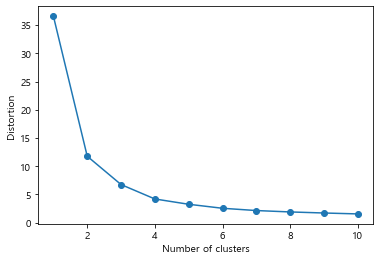

In [26]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Step2. 선택한 군집 개수만큼 클러스터링을 수행하기

In [33]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans1.fit(X_scaled)
kemans_labels = kmeans1.fit_predict(X_scaled)

plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

Step3. Scatter plot으로 군집이 잘 나누어졌는지 확인한다 (Silhouette는 생략)
- 변수의 개수가 많아 Scatter plot을 그리기 어려울 때는 2개 주성분의 Scatter plot을 그려본다

In [31]:
## 2개 주성분으로 만들고 원데이터에 pca값을 붙이기
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_scaled)
boston_pca = pca.transform(X_scaled)

boston_pca = pd.DataFrame(boston_pca, columns = ['주성분1', '주성분2'])

X = df.drop(columns = ['PRICE', 'silhouette'])
X_pca = pd.concat([X, boston_pca], axis = 1)
X_pca.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,주성분1,주성분2
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,-0.16926,-0.00670
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,-0.24990,-0.06637
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,-0.24892,-0.03739
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,-0.28708,-0.01588
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,-0.28794,-0.03009


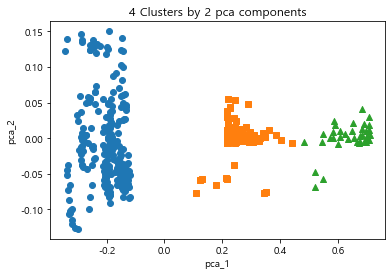

In [38]:
X_pca['cluster'] = kmeans1.labels_

marker0_ind = X_pca[X_pca['cluster']==0].index
marker1_ind = X_pca[X_pca['cluster']==1].index
marker2_ind = X_pca[X_pca['cluster']==2].index
marker2_ind = X_pca[X_pca['cluster']==3].index

plt.scatter(x=X_pca.loc[marker0_ind,'주성분1'], y=X_pca.loc[marker0_ind,'주성분2'],marker='o')
plt.scatter(x=X_pca.loc[marker1_ind,'주성분1'], y=X_pca.loc[marker1_ind,'주성분2'],marker='s')
plt.scatter(x=X_pca.loc[marker2_ind,'주성분1'], y=X_pca.loc[marker2_ind,'주성분2'],marker='^')

plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('4 Clusters by 2 pca components')
plt.show()

In [ ]:
### 분류를 위한 군집인 경우 예측군집 vs 실제y 로 비교 그래프를 그릴 수도 있다
f, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(X_pca['주성분1'], X_pca['주성분2'], c=X_pca.실제y값, cmap='gist_rainbow',edgecolor='k', s=150)
ax[1].scatter(X_pca['주성분1'], X_pca['주성분2'], c=kmeans1.labels_, cmap='jet',edgecolor='k', s=150)
ax[0].set_xlabel('주성분1', fontsize=18)
ax[0].set_ylabel('주성분2', fontsize=18)
ax[1].set_xlabel('주성분1', fontsize=18)
ax[1].set_ylabel('주성분2', fontsize=18)
ax[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('Predicted', fontsize=18)